### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [4]:
data = pd.read_csv('data/coupons.csv')

In [5]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [10]:
missing_val_count = data.isna().sum()
print(f"Missing or problematic data\n{missing_val_count}")
print(data)

Missing or problematic data
destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64
           destination  passanger weather  temperature  time  \
0      No Urgent Place      Alone   Sunny           55   2PM   
1      No Urgent Place  Friend(s)   Sunny          

3. Decide what to do about your missing data -- drop, replace, other...

In [13]:
#As Car vaklue has lots of missing data drop 'Car' column
Allcolumns = data.columns
print("All columns")
print(Allcolumns)
data = data.drop(columns = ['car'])
updatedColumn = data.columns
#list(data1.columns)
print("Updated columns after droping Car column")
print(updatedColumn)

All columns
Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')
Updated columns after droping Car column
Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')


4. What proportion of the total observations chose to accept the coupon? 



In [16]:
AcceptedCount = data['Y'].value_counts()[1]
OverallCount = data['Y'].count()

print(f"Total number who accept coupon {AcceptedCount}")
print(f"Overall count {OverallCount}")

proportion = (AcceptedCount/OverallCount)*100
print(f"Proportion of who accepts the coupon: {proportion}")

Total number who accept coupon 7210
Overall count 12684
Proportion of who accepts the coupon: 56.84326710816777


5. Use a bar plot to visualize the `coupon` column.

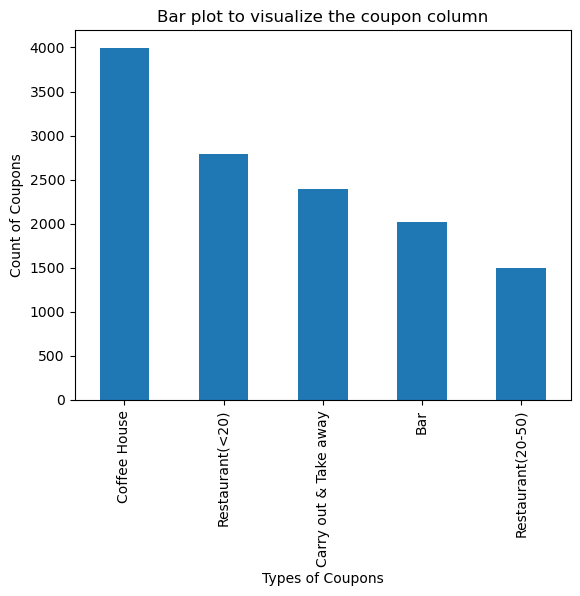

In [19]:
ax = data['coupon'].value_counts().plot(kind='bar')
plt.title('Bar plot to visualize the coupon column') 
ax.set_xlabel("Types of Coupons")
ax.set_ylabel("Count of Coupons")
plt.show()

6. Use a histogram to visualize the temperature column.

Text(0, 0.5, 'Count')

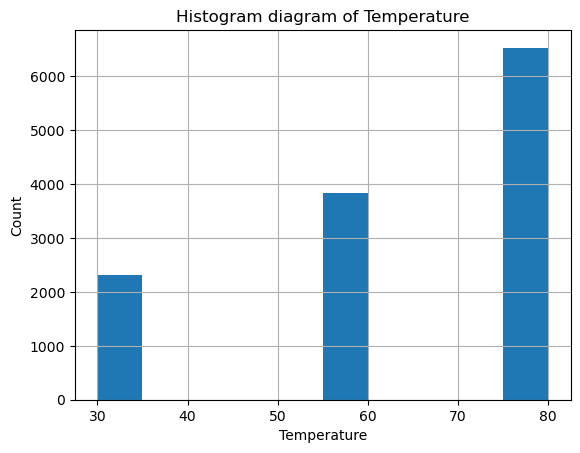

In [22]:
hist = data.hist(column='temperature')
plt.title('Histogram diagram of Temperature') 
plt.xlabel('Temperature') 
plt.ylabel('Count') 

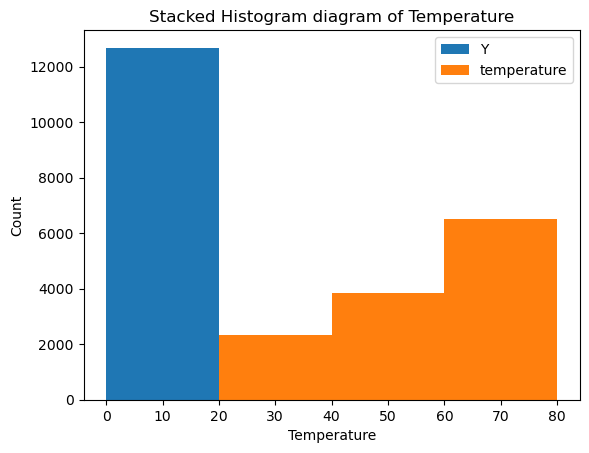

In [24]:
plt.hist([data['Y'], data['temperature']], bins=4, stacked = True)
plt.title('Stacked Histogram diagram of Temperature') 
plt.xlabel('Temperature') 
plt.ylabel('Count') 
plt.legend(['Y','temperature'])
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

<Axes: xlabel='temperature', ylabel='Count'>

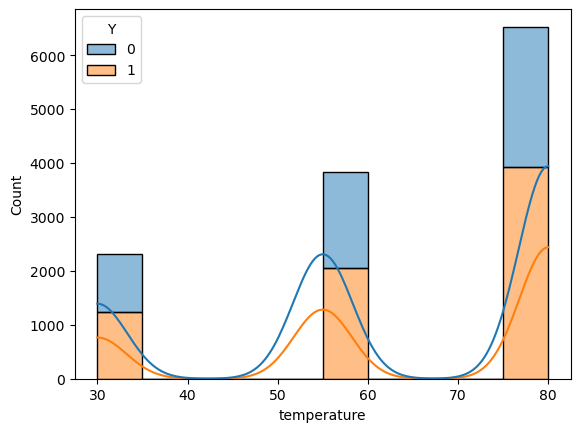

In [26]:
sns.histplot(data=data, x="temperature", hue="Y", bins=10, kde = True, multiple="stack")

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [31]:
bardata = data[data['coupon'] == 'Bar']
print("Investigating the Bar coupons")
print(bardata)

Investigating the Bar coupons
           destination  passanger weather  temperature  time coupon  \
9      No Urgent Place     Kid(s)   Sunny           80  10AM    Bar   
13                Home      Alone   Sunny           55   6PM    Bar   
17                Work      Alone   Sunny           55   7AM    Bar   
24     No Urgent Place  Friend(s)   Sunny           80  10AM    Bar   
35                Home      Alone   Sunny           55   6PM    Bar   
...                ...        ...     ...          ...   ...    ...   
12663  No Urgent Place  Friend(s)   Sunny           80  10PM    Bar   
12664  No Urgent Place  Friend(s)   Sunny           55  10PM    Bar   
12667  No Urgent Place      Alone   Rainy           55  10AM    Bar   
12670  No Urgent Place    Partner   Rainy           55   6PM    Bar   
12682             Work      Alone   Snowy           30   7AM    Bar   

      expiration  gender age      maritalStatus  ...  CoffeeHouse CarryAway  \
9             1d  Female  21  Unmarrie

2. What proportion of bar coupons were accepted?


In [34]:
print("Identify proportion of bar coupons accepted")

acceptedCount = bardata['Y'].value_counts()[1]
totalCount = bardata['Y'].count()

proportion = (acceptedCount/totalCount)*100

print(f"Accepted count {acceptedCount}")
print(f"Total count {totalCount}")
print(f"Proportion of bar coupons were accepted {proportion}")

Identify proportion of bar coupons accepted
Accepted count 827
Total count 2017
Proportion of bar coupons were accepted 41.00148735746158


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [37]:
print("Compare various acceptance rates")
lessthan3timeBar = bardata[bardata['Bar'].isin(['never', 'less1', '1~3'])]
morethan3timeBar = bardata[bardata['Bar'].isin(['4~8','gr8'])]

lessthan3timeBar_acceptance = lessthan3timeBar['Y'].mean()
morethan3timeBar_acceptance = morethan3timeBar['Y'].mean()

print(f"Acceptance Rate for drivers who went to a bar 3 or fewer times a month is {lessthan3timeBar_acceptance}")
print(f"Acceptance Rate for drivers who went to a bar more that 3 times is {morethan3timeBar_acceptance}")

Compare various acceptance rates
Acceptance Rate for drivers who went to a bar 3 or fewer times a month is 0.37061769616026713
Acceptance Rate for drivers who went to a bar more that 3 times is 0.78


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [40]:
print("Compare various acceptance rates 2")

moreThanOnceAndAge25 = bardata[bardata['Bar'].isin(['1~3', '4~8', 'gr8']) & (bardata['age'] > '25')]
notMoreThanOnceAndAge25 = bardata[~(bardata['Bar'].isin(['1~3','4~8','gr8']) & (bardata['age'] < '25'))]

AccmoreThanOnceAndAge25 = moreThanOnceAndAge25['Y'].mean()
AccnotMoreThanOnceAndAge25 = notMoreThanOnceAndAge25['Y'].mean()

print(f"Acceptance Rate for drivers who go to a bar more than once a month and are over the age of 25 is {AccmoreThanOnceAndAge25}")
print(f"Acceptance Rate for all other drivers is {AccnotMoreThanOnceAndAge25}")

Compare various acceptance rates 2
Acceptance Rate for drivers who go to a bar more than once a month and are over the age of 25 is 0.6893939393939394
Acceptance Rate for all other drivers is 0.3890675241157556


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [43]:
print("Compare various acceptance rates 3")
driver1MonthNoKIds = bardata[bardata['Bar'].isin(['1~3', '4~8', 'gr8']) 
                        & (bardata['passanger'] != 'Kids') 
                        & (bardata['occupation'] != 'Farming Fishing & Forestry')]

allOtherDrivers = bardata[~(bardata['Bar'].isin(['1~3', '4~8', 'gr8']) 
                        & (bardata['passanger'] != 'Kids') 
                        & (bardata['occupation'] != 'Farming Fishing & Forestry'))]

Accptdata = driver1MonthNoKIds['Y'].mean()
otherdata = allOtherDrivers['Y'].mean()

print(f"Acceptance Rate for drivers who go to bars more than once a month and had passengers that were not a kid is {Accptdata}")
print(f"Acceptance Rate for all other drivers is {otherdata}")

Compare various acceptance rates 3
Acceptance Rate for drivers who go to bars more than once a month and had passengers that were not a kid is 0.6837294332723949
Acceptance Rate for all other drivers is 0.3081632653061224


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [46]:
print("Compare various acceptance rates 4")
driverlist1 = bardata[bardata['Bar'].isin(['1~3', '4~8', 'gr8']) 
                        & (bardata['passanger'] != 'Kids') 
                        & (bardata['maritalStatus'] != 'Widowed')]

driverlist2 = bardata[(bardata['Bar'].isin(['1~3', '4~8', 'gr8'])) 
                        & (bardata['age'] < '30')] 

driverlist3 = bardata[(bardata['RestaurantLessThan20'].isin(['4~8', 'gr8']) )
                        & (bardata['income'] < '$50000')]

accepData1 = driverlist1['Y'].mean()
print(f"Acceptance Rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed is {accepData1}")
accepData2 = driverlist2['Y'].mean()
print(f"Acceptance Rate for drivers who go to bars more than once a month and are under the age of 30 is {accepData2}")
accepData3 = driverlist3['Y'].mean()
print(f"Acceptance Rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K is {accepData3}")

Compare various acceptance rates 4
Acceptance Rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed is 0.6837294332723949
Acceptance Rate for drivers who go to bars more than once a month and are under the age of 30 is 0.7185430463576159
Acceptance Rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K is 0.4271186440677966


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [49]:
#Overall Proportion of coupons accepted are 56%
#Proportion of bar coupon accepted 41%
#Drivers who went bar more than 3 times accepts more coupons 
#Drivers who age is less than 30 accepts more coupons 
#Farming Fishing & Forestry mainly not urban drivers less likely accepts coupons 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [52]:
coffeeHouseData = data[data['coupon'] == 'Coffee House']
print("Investigating the CoffeeHouse coupons")
print(coffeeHouseData)

Investigating the CoffeeHouse coupons
           destination  passanger weather  temperature  time        coupon  \
1      No Urgent Place  Friend(s)   Sunny           80  10AM  Coffee House   
3      No Urgent Place  Friend(s)   Sunny           80   2PM  Coffee House   
4      No Urgent Place  Friend(s)   Sunny           80   2PM  Coffee House   
12     No Urgent Place     Kid(s)   Sunny           55   6PM  Coffee House   
15                Home      Alone   Sunny           80   6PM  Coffee House   
...                ...        ...     ...          ...   ...           ...   
12656             Home      Alone   Snowy           30  10PM  Coffee House   
12659             Work      Alone   Snowy           30   7AM  Coffee House   
12674             Home      Alone   Rainy           55  10PM  Coffee House   
12675             Home      Alone   Snowy           30  10PM  Coffee House   
12681             Work      Alone   Snowy           30   7AM  Coffee House   

      expiration  gender 

In [54]:
print("Identify proportion of Coffee House coupons accepted")

acceptedCount = coffeeHouseData['Y'].value_counts()[1]
totalCount = coffeeHouseData['Y'].count()

proportion = (acceptedCount/totalCount)*100

print(f"Accepted count from Coffee house: {acceptedCount}")
print(f"Total count: {totalCount}")
print(f"Proportion of Coffee House coupons were accepted: {proportion}")

Identify proportion of Coffee House coupons accepted
Accepted count from Coffee house: 1995
Total count: 3996
Proportion of Coffee House coupons were accepted: 49.92492492492492


In [66]:
print("Compare various acceptance rates")
driverlist1 = coffeeHouseData[coffeeHouseData['CoffeeHouse'].isin(['1~3', '4~8', 'gr8']) 
                        & (coffeeHouseData['gender'] == 'Female') 
                        & (coffeeHouseData['maritalStatus'] != 'Single')]

driverlist2 = coffeeHouseData[coffeeHouseData['CoffeeHouse'].isin(['1~3', '4~8', 'gr8']) 
                        & (coffeeHouseData['age'] < '30')] 

acceptData1 = driverlist1['Y'].mean()
acceptData2 = driverlist2['Y'].mean()

print(f"Accepted count female drivers who go to CoffeeHouse more than once a month and they are single: {acceptData1}")
print(f"Accepted count of drivers who go to CoffeeHouse more than once a month and thier age is less than 30: {acceptData2}")

Compare various acceptance rates
Accepted count female drivers who go to CoffeeHouse more than once a month and they are single: 0.6744186046511628
Accepted count of drivers who go to CoffeeHouse more than once a month and thier age is less than 30: 0.6918687589158345


In [68]:
print("Compare Acceptnace of various male and female drivers for coffeeHouse coupons")
driverlist1 = coffeeHouseData[(coffeeHouseData['gender'] == 'Male') & coffeeHouseData['age'] < 30] 
driverlist1 = coffeeHouseData[(coffeeHouseData['gender'] == 'Female') & coffeeHouseData['age'] < 30]

acceptData1 = driverlist1['Y'].mean()
acceptData2 = driverlist2['Y'].mean()

print(f"Accepted count male drivers who go to CoffeeHouse and thier age less than 30: {acceptData1}")
print(f"Accepted count female drivers who go to CoffeeHouse and thier age less than 30: {acceptData2}")

Compare Acceptnace of various male and female drivers for coffeeHouse coupons
Accepted count male drivers who go to CoffeeHouse and thier age less than 30: 0.49924924924924924
Accepted count female drivers who go to CoffeeHouse and thier age less than 30: 0.6918687589158345


In [70]:
print("Acceptance for Rainy and Show days")
driverlist1 = coffeeHouseData[coffeeHouseData['weather'] == 'Snowy']
driverlist2 = coffeeHouseData[coffeeHouseData['weather'] == 'Rainy']

acceptData1 = driverlist1['Y'].mean()
acceptData2 = driverlist2['Y'].mean()

print(f"Accepted count drivers who go to CoffeeHouse when weather is Snowy : {acceptData1}")
print(f"Accepted count drivers who go to CoffeeHouse when weather is Rainy: {acceptData2}")

Acceptance for Rainy and Show days
Accepted count drivers who go to CoffeeHouse when weather is Snowy : 0.43234323432343236
Accepted count drivers who go to CoffeeHouse when weather is Rainy: 0.5221238938053098


In [72]:
#Get all accepted drivers
All_y_equals_1_df = data[data['Y']==1]
print(All_y_equals_1_df)

           destination  passanger weather  temperature  time  \
0      No Urgent Place      Alone   Sunny           55   2PM   
2      No Urgent Place  Friend(s)   Sunny           80  10AM   
5      No Urgent Place  Friend(s)   Sunny           80   6PM   
6      No Urgent Place  Friend(s)   Sunny           55   2PM   
7      No Urgent Place     Kid(s)   Sunny           80  10AM   
...                ...        ...     ...          ...   ...   
12671  No Urgent Place    Partner   Snowy           30  10AM   
12676             Home      Alone   Sunny           80   6PM   
12677             Home    Partner   Sunny           30   6PM   
12679             Home    Partner   Rainy           55   6PM   
12680             Work      Alone   Rainy           55   7AM   

                      coupon expiration  gender age      maritalStatus  ...  \
0            Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
2      Carry out & Take away         2h  Female  21  Unmarried partner  .

In [74]:
All_y_equals_1_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7210 entries, 0 to 12680
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           7210 non-null   object
 1   passanger             7210 non-null   object
 2   weather               7210 non-null   object
 3   temperature           7210 non-null   int64 
 4   time                  7210 non-null   object
 5   coupon                7210 non-null   object
 6   expiration            7210 non-null   object
 7   gender                7210 non-null   object
 8   age                   7210 non-null   object
 9   maritalStatus         7210 non-null   object
 10  has_children          7210 non-null   int64 
 11  education             7210 non-null   object
 12  occupation            7210 non-null   object
 13  income                7210 non-null   object
 14  Bar                   7155 non-null   object
 15  CoffeeHouse           7100 non-null   obje